In [3]:
import sys
import os

# نمایش مسیر دقیق فایل پایتون در حال اجرا
print("Python Executable Path:")
print(sys.executable)

# نمایش نسخه پایتون
print("\nPython Version:")
print(sys.version)

# نمایش نام محیط فعال (اگر در کاندو هستی)
print("\nConda Environment:")
print(os.environ.get('CONDA_DEFAULT_ENV'))

Python Executable Path:
c:\Users\msabe\miniconda3\envs\goldsilver\python.exe

Python Version:
3.14.2 | packaged by Anaconda, Inc. | (main, Dec 19 2025, 11:44:48) [MSC v.1929 64 bit (AMD64)]

Conda Environment:
goldsilver


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load clean data**

In [6]:
panel_df = pd.read_csv('../data/cleaned/panel_df.csv', parse_dates=['date'], index_col=['ticker', 'date'])
panel_df.head()


,,high,low,close,value,volume,open_interest,open,last,return,log_return,is_extreme
ticker,date,,,,,,,,,,,
Absal,2001-03-27,1502.0,1489.0,1502.0,3.017019e+07,20147.0,17.0,1502.0,1502.0,0.000000,0.000000,False
Bank.Melli.Inv.,2001-03-27,3104.0,3100.0,3104.0,1.434575e+07,4624.0,6.0,3100.0,3104.0,0.001290,0.001289,False
Exir.Pharm.,2001-03-27,4229.0,4225.0,4229.0,9.746574e+06,2306.0,10.0,4226.0,4229.0,0.000710,0.000710,False
Ghadir.Inv.,2001-03-27,2167.0,2160.0,2162.0,2.380460e+09,1100650.0,271.0,2120.0,2162.0,0.019811,0.019618,False
Glass.and.Gas,2001-03-27,9100.0,9050.0,9050.0,3.760680e+07,4147.0,9.0,9050.0,9050.0,0.000000,0.000000,False


**Market Overview/ Sanity Check**

In this section, we are looking to answer these questions:

- How wide is the data? (How many stocks do we have and how many rows of data in total?)
- What is our time frame? (What year does the data start and how long does it last?)
- How long is it? (Can all stocks exist or re-enter the market?)

Metrics Concept:

- Unique Tickers: The number of distinct tickers. This tells us how diversified the asset is.
- Time Span: The distance between the first and last available dates.
- Data Density: If there is a 10-year market, there will be about 2,400 days. If there are fewer rows, it means there has been a lot of volatility.

In [7]:

# 1. Summary Statistics using MultiIndex levels
# level 0 is 'ticker', level 1 is 'date'
n_tickers = panel_df.index.get_level_values('ticker').nunique()
start_date = panel_df.index.get_level_values('date').min()
end_date = panel_df.index.get_level_values('date').max()
total_rows = len(panel_df)

print(f"--- Dataset Overview ---")
print(f"Total Number of Tickers: {n_tickers}")
print(f"Full Time Range: {start_date.date()} to {end_date.date()}")
print(f"Total Observations: {total_rows:,} rows")

# 2. Coverage per Ticker
# Since 'ticker' is index level 0, we group by level=0 or level='ticker'
ticker_coverage = panel_df.groupby(level='ticker').size().sort_values(ascending=False)

print(f"\n--- Coverage Statistics (Days per Ticker) ---")
print(ticker_coverage.describe())

# 3. Quick Peak at the Data
print("\n--- First 5 rows of the MultiIndex DataFrame ---")
print(panel_df.head())

# 4. Check for Missing Values in Columns
missing_data = panel_df.isnull().sum()
if missing_data.sum() > 0:
    print(f"\n--- Missing Values Found in Columns ---")
    print(missing_data[missing_data > 0])
else:
    print("\nNo missing values in numerical columns. Ready for EDA!")

--- Dataset Overview ---
Total Number of Tickers: 122
Full Time Range: 2001-03-27 to 2023-01-25
Total Observations: 475,557 rows

--- Coverage Statistics (Days per Ticker) ---
count     122.000000
mean     3898.008197
std       387.023661
min      3331.000000
25%      3560.500000
50%      3826.500000
75%      4210.500000
max      4703.000000
dtype: float64

--- First 5 rows of the MultiIndex DataFrame ---
                              high     low   close         value     volume  \
ticker          date                                                          
Absal           2001-03-27  1502.0  1489.0  1502.0  3.017019e+07    20147.0   
Bank.Melli.Inv. 2001-03-27  3104.0  3100.0  3104.0  1.434575e+07     4624.0   
Exir.Pharm.     2001-03-27  4229.0  4225.0  4229.0  9.746574e+06     2306.0   
Ghadir.Inv.     2001-03-27  2167.0  2160.0  2162.0  2.380460e+09  1100650.0   
Glass.and.Gas   2001-03-27  9100.0  9050.0  9050.0  3.760680e+07     4147.0   

                            open_inte

In [8]:
# Group by ticker and get a statistical summary of returns
eda_summary = panel_df.groupby('ticker')['return'].describe()

# Find the most volatile stocks (highest standard deviation)
volatile_stocks = eda_summary.sort_values(by='std', ascending=False).head(10)

print("Top 10 Most Volatile Stocks:")
print(volatile_stocks)

Top 10 Most Volatile Stocks:
                  count      mean       std       min       25%       50%  \
ticker                                                                      
Iran.Mineral.P.  3646.0  0.001536  0.026031 -0.049791 -0.017625 -0.000326   
Takceram         3476.0  0.001845  0.026005 -0.049793 -0.016141  0.000000   
DPI              3776.0  0.001718  0.025800 -0.049791 -0.017594  0.000000   
N..I..L..Z.      3718.0  0.001182  0.025757 -0.049796 -0.017303 -0.000448   
S*Azarab.Ind.    3557.0  0.001583  0.025622 -0.049687 -0.017817  0.000000   
Azar.Refract.    3656.0  0.001157  0.025180 -0.049725 -0.014779 -0.000110   
Iran.Kh..A..M.   3834.0  0.001947  0.024966 -0.049794 -0.012808  0.000000   
Technotar        3448.0  0.001131  0.024859 -0.049790 -0.015905 -0.000479   
Loabiran         3628.0  0.001995  0.024597 -0.049798 -0.013878  0.000000   
Iran.Tire        3416.0  0.001152  0.024586 -0.049782 -0.014451  0.000000   

                      75%       max  
ticker  

**Distribution of Returns**

Now we want to see how the returns are distributed. In ideal financial markets, we would expect the distribution to be similar to a “bell chart” (normal), but in reality we encounter two phenomena:

- Fat Tails: This means that the number of days when we had very large profits or losses is higher than expected.
- Skewness: This means that the market tends towards small continuous gains or sudden falls?


--- Return Distribution Stats ---
count    475557.000000
mean          0.001273
std           0.020721
min          -0.049802
25%          -0.007685
50%           0.000000
75%           0.009738
max           0.049952
Name: return, dtype: float64
Skewness: 0.20
Kurtosis: 0.29


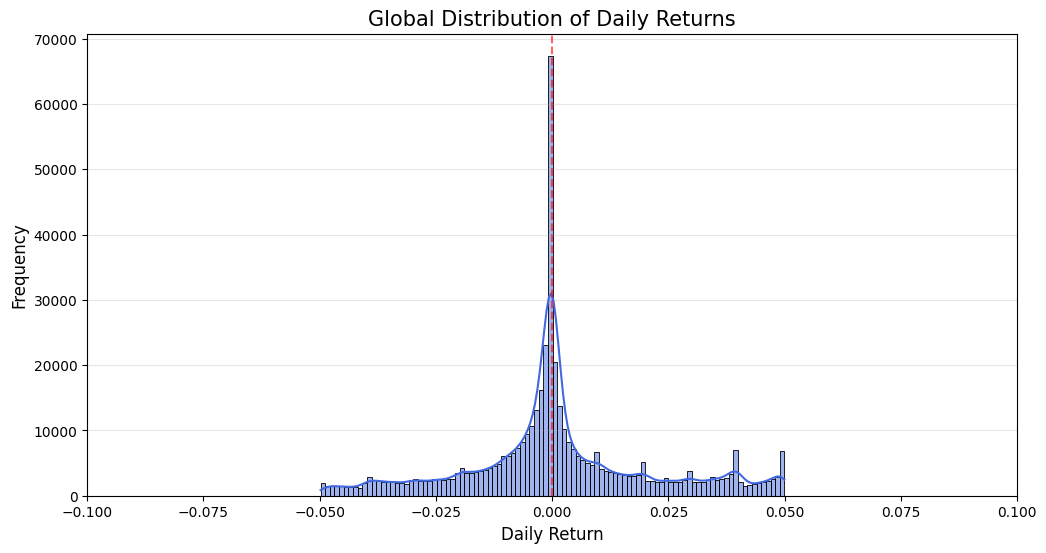

In [9]:

# 1. Descriptive Statistics for Returns
print("--- Return Distribution Stats ---")
print(panel_df['return'].describe())
print(f"Skewness: {panel_df['return'].skew():.2f}")
print(f"Kurtosis: {panel_df['return'].kurt():.2f}")

# 2. Visualizing the Distribution
plt.figure(figsize=(12, 6))

# Histogram + KDE
sns.histplot(panel_df['return'], bins=100, kde=True, color='royalblue')

# Formatting
plt.title('Global Distribution of Daily Returns', fontsize=15)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(0, color='red', linestyle='--', alpha=0.6) # Zero line
plt.grid(axis='y', alpha=0.3)

# Limit x-axis to see the bulk of data (removing extreme outliers from view)
plt.xlim(-0.1, 0.1) 

plt.show()

2. Skewness (Skewness: 0.20)

- The number 0.20 is positive.
- This means that the distribution is slightly skewed to the right.
- Interpretation: In the long run, the weight of positive days and small increases has been slightly greater than the sharp drops. This is good news for investors because it indicates a positive bias in the market.

3. Kurtosis (Kurtosis: 0.29)

- This number is very interesting! Usually in financial data, Kurtosis is very large numbers (like 5 or 10), indicating "fat tails" and sudden risks.
- But here the number is 0.29, which is very close to the normal distribution (which is 3 and is measured in the form of Excess Kurtosis around zero).
- Reason: Again, the same range of fluctuations! It does not allow for unusual returns (e.g. 20% in one day), so the "tails of the distribution" are flattened and the skewness number remains low.

4. Concentration around zero (The Peak)
- The very high peak at zero indicates that a large portion of the data is from days when the stock was either closed or traded unchanged.

5. Statistical Analysis (Quick Summary):

- Mean: About 0.0012 (i.e., an average daily gain of 0.12%).
- Standard Deviation (Std): About 0.02 (the typical daily market fluctuation is 2%).
- Median (50%): Exactly 0.00. This means that half of the days in the history of the stock market have had zero or negative returns.

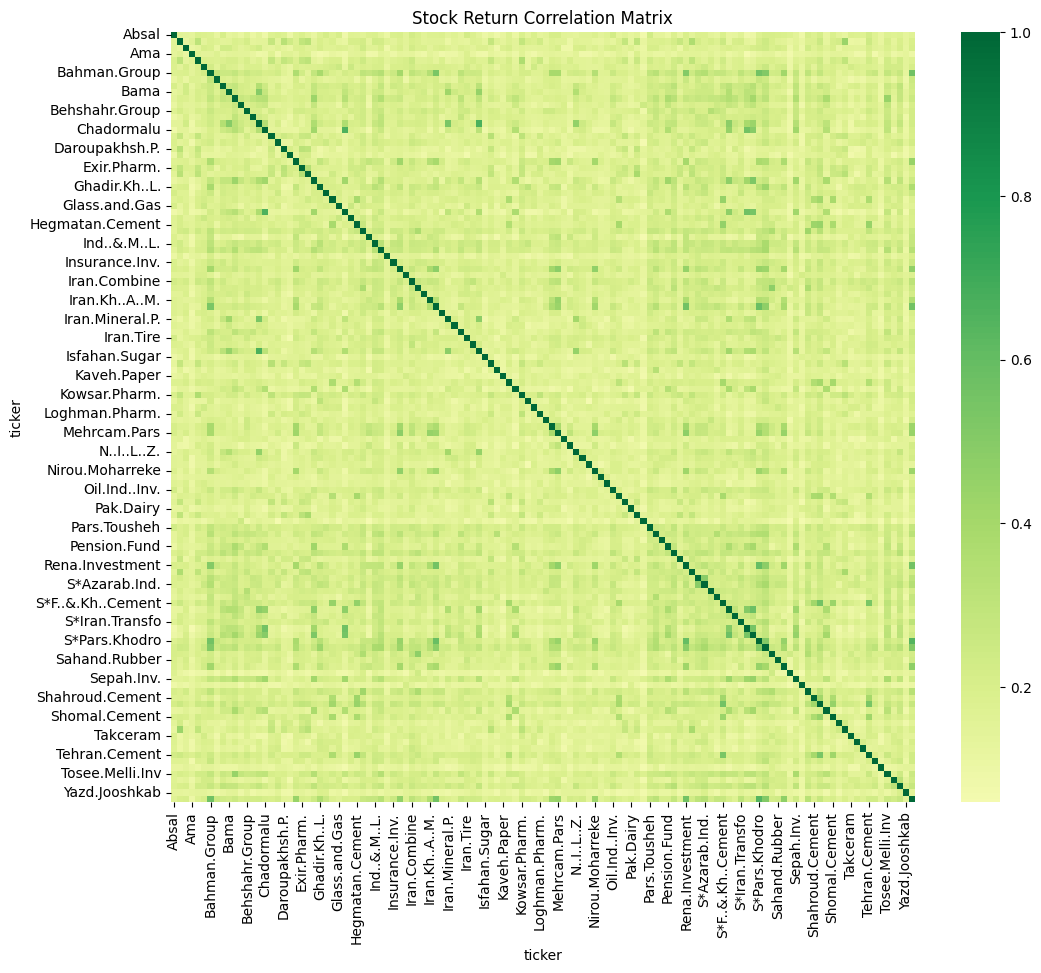

---Top 5 Least Correlated Pairs:---
ticker         ticker         
Ama            S*Metals.&.Min.    0.059706
I..T..Foundry  Pars.Oil           0.061624
Leasing.Iran   NiroCholor         0.061808
Pars.Oil       Saman.Gostar       0.062072
DPI            Pars.Oil           0.063166
dtype: float64
---Top 5 Most Correlated Pairs:---
ticker           ticker         
Calcimine        Iran.Zinc.Mines    0.664667
Chadormalu       Gol-E-Gohar.       0.657148
S*Pars.Khodro    Zamyad             0.644668
Rena.Investment  S*Pars.Khodro      0.596966
Iran.Khodro      S*Pars.Khodro      0.589623
dtype: float64


In [10]:


# 1. Prepare data: Tickers as columns, Dates as rows, Returns as values
corr_df = panel_df.reset_index().pivot(index='date', columns='ticker', values='return')

# 2. Calculate Correlation Matrix
# We use 'spearman' because financial returns are often non-normal
correlation_matrix = corr_df.corr(method='spearman')

# 3. Plotting the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='RdYlGn', center=0)
plt.title('Stock Return Correlation Matrix')
plt.show()

# 4. Find highly correlated pairs (Top 5)
sol = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack()
print("---Top 5 Least Correlated Pairs:---")
print(sol.sort_values(ascending=True).head(5))

# 5. Show top 5 least correlated pairs: less risky to be in a same portfolio
print("---Top 5 Most Correlated Pairs:---")
print(sol.sort_values(ascending=False).head(5))

In [11]:
# Average correlation of each stock with all other stocks
avg_corr_per_ticker = correlation_matrix.mean().sort_values()

print("Tickers with lowest average correlation to the market:")
print(avg_corr_per_ticker.head(5))


Tickers with lowest average correlation to the market:
ticker
Saman.Gostar       0.131126
Shahdiran.Inc.     0.131194
Pars.Oil           0.132866
Toosgostar.Inv.    0.134435
Ama                0.135143
dtype: float64



When you calculate the average correlation of a stock with all other stocks, you are essentially measuring how “social” or “in-tune” that stock is.
The stocks that rank first on this list (the lowest average) are so-called Idiosyncratic stocks, or stocks with “unique behavior.”



**Volatility Analysis**

Now that we understand how the overall market behaves, the question is: which stocks were the most volatile and which were the most calm?

--- Top 10 Most Volatile Tickers (Highest Risk) ---
ticker
Iran.Mineral.P.    0.026031
Takceram           0.026005
DPI                0.025800
N..I..L..Z.        0.025757
S*Azarab.Ind.      0.025622
Azar.Refract.      0.025180
Iran.Kh..A..M.     0.024966
Technotar          0.024859
Loabiran           0.024597
Iran.Tire          0.024586
Name: return, dtype: float64

--- Top 10 Least Volatile Tickers (Most Stable) ---
ticker
Pars.Oil           0.015812
Karafarin.Bank     0.015811
Daroupakhsh.P.     0.015750
Tosee.Melli.Inv    0.015715
Inf..Services      0.015622
Osvah.Pharm.       0.015548
Khark.Petr.        0.015255
Behran.Oil         0.015000
Razak.Lab.         0.014462
Sina.Darou.Lab.    0.014260
Name: return, dtype: float64


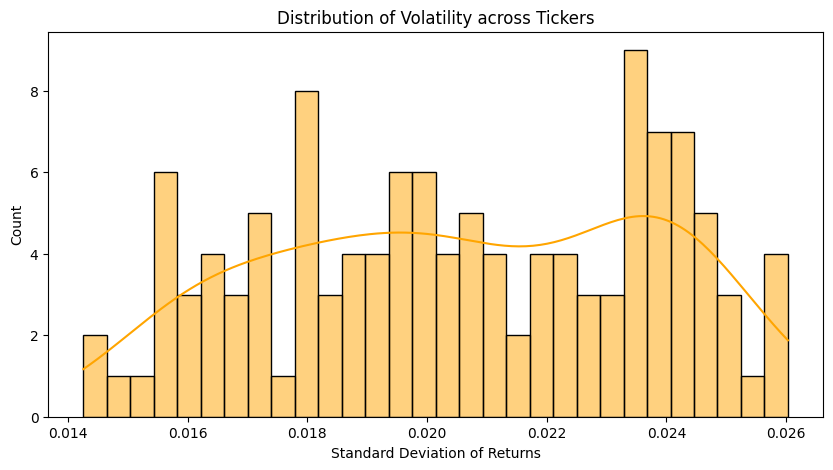

In [12]:
# Calculate standard deviation for each ticker
volatility = panel_df.groupby(level='ticker')['return'].std().sort_values(ascending=False)

print("--- Top 10 Most Volatile Tickers (Highest Risk) ---")
print(volatility.head(10))

print("\n--- Top 10 Least Volatile Tickers (Most Stable) ---")
print(volatility.tail(10))

# Plotting the distribution of volatility
plt.figure(figsize=(10, 5))
sns.histplot(volatility, bins=30, kde=True, color='orange')
plt.title('Distribution of Volatility across Tickers')
plt.xlabel('Standard Deviation of Returns')
plt.show()

In [13]:
# 1. Calculate Mean and Std (Volatility) per ticker
ticker_stats = panel_df.groupby(level='ticker')['return'].agg(['mean', 'std'])

# 2. Get the 10 most volatile stocks
top_volatile = ticker_stats.sort_values(by='std', ascending=False).head(10)

# 3. Rename columns for clarity
top_volatile.columns = ['Average Return', 'Volatility (Risk)']

print("Top 10 Volatile Stocks and their Average Returns:")
print(top_volatile)

Top 10 Volatile Stocks and their Average Returns:
                 Average Return  Volatility (Risk)
ticker                                            
Iran.Mineral.P.        0.001536           0.026031
Takceram               0.001845           0.026005
DPI                    0.001718           0.025800
N..I..L..Z.            0.001182           0.025757
S*Azarab.Ind.          0.001583           0.025622
Azar.Refract.          0.001157           0.025180
Iran.Kh..A..M.         0.001947           0.024966
Technotar              0.001131           0.024859
Loabiran               0.001995           0.024597
Iran.Tire              0.001152           0.024586


If a stock has high volatility and a positive average return: it means that the stock was risky but profitable (like small-cap growth stocks).

If a stock has high volatility and a negative average return: it means that the stock only had "destructive swings" and eroded capital.

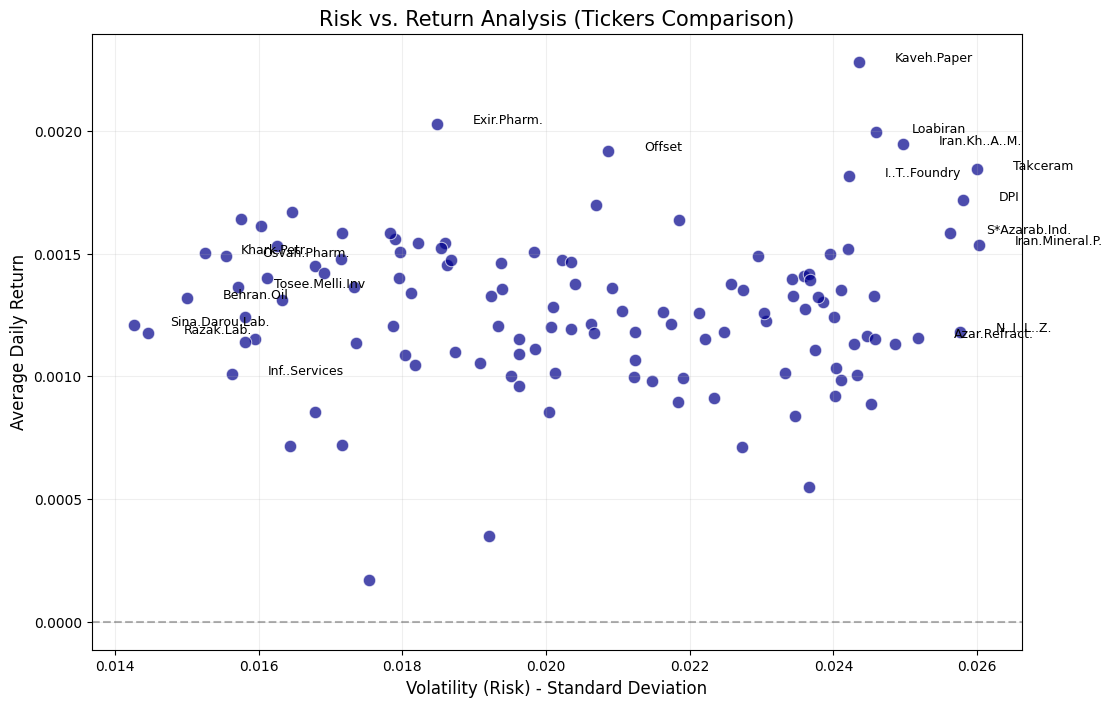

In [14]:

ticker_stats.columns = ['Return', 'Risk']

# 2. Create the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=ticker_stats, x='Risk', y='Return', alpha=0.7, s=80, color='darkblue')

# 3. Add labels for some interesting tickers (the ones at the edges)
# Stocks with highest return, lowest risk, or highest risk
for ticker in ticker_stats.index:
    if (ticker_stats.loc[ticker, 'Return'] > ticker_stats['Return'].quantile(0.95) or 
        ticker_stats.loc[ticker, 'Risk'] > ticker_stats['Risk'].quantile(0.95) or
        ticker_stats.loc[ticker, 'Risk'] < ticker_stats['Risk'].quantile(0.05)):
        plt.text(ticker_stats.loc[ticker, 'Risk']+0.0005, ticker_stats.loc[ticker, 'Return'], ticker, fontsize=9)

# 4. Final touches
plt.axhline(0, color='black', linestyle='--', alpha=0.3)
plt.title('Risk vs. Return Analysis (Tickers Comparison)', fontsize=15)
plt.xlabel('Volatility (Risk) - Standard Deviation', fontsize=12)
plt.ylabel('Average Daily Return', fontsize=12)
plt.grid(True, alpha=0.2)

plt.show()

In [15]:
ticker_stats['Efficiency'] = ticker_stats['Return'] / ticker_stats['Risk']
top_efficient = ticker_stats.sort_values(by='Efficiency', ascending=False)

print("Top 5 Efficient Stocks (Best Return/Risk ratio):")
print(top_efficient.head(5))

Top 5 Efficient Stocks (Best Return/Risk ratio):
                  Return      Risk  Efficiency
ticker                                        
Exir.Pharm.     0.002030  0.018480    0.109858
Daroupakhsh.P.  0.001640  0.015750    0.104112
Alborz.Darou    0.001669  0.016465    0.101348
Dr..Abidi.Lab.  0.001613  0.016036    0.100566
Khark.Petr.     0.001501  0.015255    0.098393


In [16]:
comparison = ticker_stats.copy()

# rank by return 
comparison['Return_Rank'] = ticker_stats['Return'].rank(ascending=False)

# rank by efficiency
comparison['Efficiency_Rank'] = ticker_stats['Efficiency'].rank(ascending=False)

# پیدا کردن سهم‌هایی که در هر دو عالی هستند (مثلاً جزو ۲۰تای اول هر دو لیست)
star_stocks = comparison[(comparison['Return_Rank'] <= 20) & (comparison['Efficiency_Rank'] <= 20)]

print("Star Stocks (High Return AND High Efficiency):")
print(star_stocks.sort_values(by='Efficiency_Rank'))

Star Stocks (High Return AND High Efficiency):
                   Return      Risk  Efficiency  Return_Rank  Efficiency_Rank
ticker                                                                       
Exir.Pharm.      0.002030  0.018480    0.109858          2.0              1.0
Daroupakhsh.P.   0.001640  0.015750    0.104112         11.0              2.0
Alborz.Darou     0.001669  0.016465    0.101348         10.0              3.0
Dr..Abidi.Lab.   0.001613  0.016036    0.100566         13.0              4.0
Kaveh.Paper      0.002282  0.024350    0.093723          1.0              8.0
Bank.Melli.Inv.  0.001583  0.017158    0.092289         15.0              9.0
Offset           0.001919  0.020862    0.092004          5.0             10.0
Farabi.Pharm.    0.001585  0.017821    0.088938         14.0             11.0
Chadormalu       0.001559  0.017902    0.087069         17.0             13.0
Ghadir.Inv.      0.001545  0.018211    0.084826         18.0             18.0


**Liquidity**

There is a big trap on the Tehran Stock Exchange: a stock with a very high Efficiency but almost zero trading volume! Why? Because when a stock is not traded, its price remains constant (zero volatility). When volatility is zero, it is in the denominator of the fraction, making the Efficiency number falsely show infinity.

So, the next logical step is to check this list of “stars” with the Liquidity (Volume/Value) filter.

In this section, I want you to answer 3 questions:

- Value: How many rials does each share trade on average per day?
- Liquidity Stability: What percentage of days do shares have zero-volume days?
- Liquidity-yield relationship: Do more liquid stocks also yield higher returns?

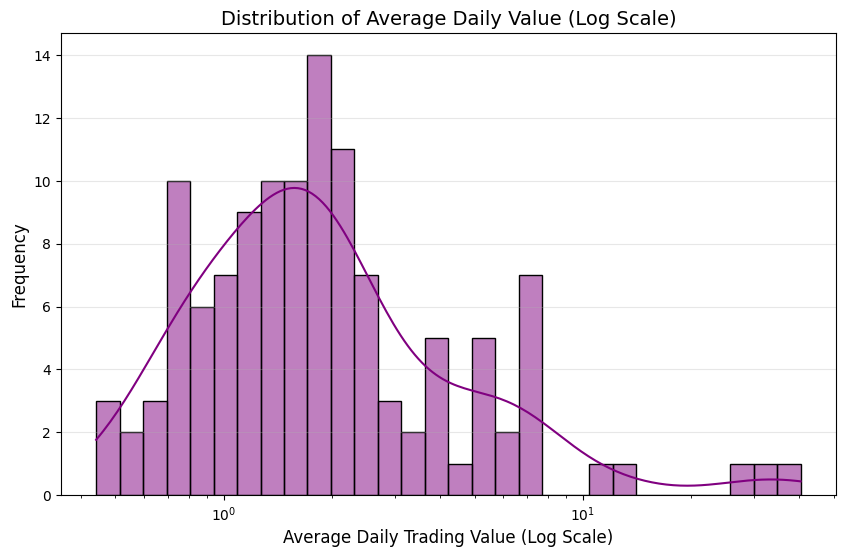

Top 10 Most Illiquid Tickers (High Zero-Volume Days):
                Avg_Daily_Value  Zero_Days_Percent    Return  Efficiency  \
ticker                                                                     
Absal                  0.831218                0.0  0.001214    0.055858   
Alborz.Darou           0.792383                0.0  0.001669    0.101348   
Aluminum.R.            1.493128                0.0  0.001351    0.056033   
Ama                    0.870268                0.0  0.001137    0.065475   
Amin.Pharm.            0.939636                0.0  0.001206    0.062429   
Azar.Refract.          1.762690                0.0  0.001157    0.045946   
Bahman.Group           7.581242                0.0  0.001358    0.064917   
Bahman.Inv.            1.346304                0.0  0.000716    0.043546   
Bahonar.Copper         2.141652                0.0  0.001227    0.053194   
Bama                   6.860341                0.0  0.000837    0.035661   

                    Risk  
ticker

In [17]:


# 1. Calculate Average Daily Trading Value
# 'value' is likely in Rials; dividing by 1e10 to convert to a more readable scale (Billion Tomans)
liquidity_stats = panel_df.groupby(level='ticker')['value'].mean() / 1e10 

# 2. Calculate Percentage of Zero-Volume Days
# High percentage indicates the stock is frequently frozen or lacks buyers/sellers
zero_days = panel_df.groupby(level='ticker')['volume'].apply(lambda x: (x == 0).mean() * 100)

# 3. Combine with previous statistics (Return and Efficiency)
liquidity_df = pd.DataFrame({
    'Avg_Daily_Value': liquidity_stats,
    'Zero_Days_Percent': zero_days,
    'Return': ticker_stats['Return'],
    'Efficiency': ticker_stats['Efficiency'],
    'Risk': ticker_stats['Risk']

})

# 4. Visualize Distribution of Trading Value using Log-Scale
# We use log_scale because value differences between small and large caps are massive
plt.figure(figsize=(10, 6))
sns.histplot(liquidity_df['Avg_Daily_Value'], bins=30, kde=True, color='purple', log_scale=True)
plt.title('Distribution of Average Daily Value (Log Scale)', fontsize=14)
plt.xlabel('Average Daily Trading Value (Log Scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# 5. Identify Illiquid Tickers
print("Top 10 Most Illiquid Tickers (High Zero-Volume Days):")
print(liquidity_df.sort_values(by='Zero_Days_Percent', ascending=False).head(10))

# 6. Final Filter: Refined "Star Stocks" based on Liquidity
# Keeping only stocks with less than 5% zero-volume days
liquid_stars = star_stocks.join(liquidity_df[['Avg_Daily_Value', 'Zero_Days_Percent']])
real_stars = liquid_stars[liquid_stars['Zero_Days_Percent'] < 5].sort_values(by='Efficiency_Rank')

print("\nReal Star Stocks (High Return, High Efficiency, and Liquid):")
print(real_stars)

- Left Density: Most of the peaks (between $10^0$ and $10^{0.5}$) have low daily value. This means your market is for small and mid-cap stocks. 
- Right Outliers: A handful of them are seen on the right side of the chart (around 10 to 40). These are the market giants (like steel in the chart above) that are 10 to 40 times more liquid than the rest.

In [18]:
liquidity_df

,Avg_Daily_Value,Zero_Days_Percent,Return,Efficiency,Risk
ticker,,,,,
Absal,0.831218,0.0,0.001214,0.055858,0.021737
Alborz.Darou,0.792383,0.0,0.001669,0.101348,0.016465
Aluminum.R.,1.493128,0.0,0.001351,0.056033,0.024104
Ama,0.870268,0.0,0.001137,0.065475,0.017359
Amin.Pharm.,0.939636,0.0,0.001206,0.062429,0.019326
...,...,...,...,...,...
Tosee.Melli.Inv,1.326386,0.0,0.001363,0.086712,0.015715
Tuka.Trans.,1.653799,0.0,0.001326,0.053986,0.024561
Tukafoolad.Inv.,2.173441,0.0,0.001394,0.058894,0.023672


With this code, we now have a list called real_stars. These stocks have three golden qualities:

- They have high returns.
- They have controlled volatility relative to their profits (Efficiency).
- They are liquid (less than 5% of days are suspended).

**Max Drawdown**

This indicator tells us how much of a loss an investor would have if they bought a stock at the worst possible time before the stock reached its previous peak again.

In [19]:
def calculate_max_drawdown(return_series):
    # 1. Calculate cumulative returns (wealth index)
    # wealth_index = (1 + r1) * (1 + r2) * ...
    wealth_index = (1 + return_series).cumprod()
    
    # 2. Calculate previous peaks
    previous_peaks = wealth_index.cummax()
    
    # 3. Calculate drawdowns (percentage drop from peak)
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    
    return drawdowns.min()

# Apply the function to each ticker
# We group by ticker to ensure we don't mix different stocks' prices
mdd_stats = panel_df.groupby(level='ticker')['return'].apply(calculate_max_drawdown)

# Convert to a DataFrame and rename
mdd_df = mdd_stats.to_frame(name='Max_Drawdown')

# Add this to our liquidity_df for a complete picture
final_analysis = liquidity_df.join(mdd_df)

print("Top 10 Stocks with Smallest Max Drawdown (Most Resilient):")
print(final_analysis.sort_values(by='Max_Drawdown', ascending=False).head(10))

print("\nTop 10 Stocks with Largest Max Drawdown (Most Painful):")
print(final_analysis.sort_values(by='Max_Drawdown', ascending=True).head(10))

Top 10 Stocks with Smallest Max Drawdown (Most Resilient):
                   Avg_Daily_Value  Zero_Days_Percent    Return  Efficiency  \
ticker                                                                        
Motogen                   1.309280                0.0  0.001543    0.082959   
S*Iran.Chem..Ind.         6.377480                0.0  0.001509    0.083977   
Pension.Fund              3.087714                0.0  0.001530    0.094091   
Sepah.Inv.                1.750836                0.0  0.001478    0.086235   
Kerman.Cement             0.754439                0.0  0.001449    0.086329   
Sobhan.Pharm.             0.662952                0.0  0.001421    0.084050   
Ghadir.Inv.              11.397799                0.0  0.001545    0.084826   
Daroupakhsh.P.            0.707776                0.0  0.001640    0.104112   
Khark.Petr.               1.826235                0.0  0.001501    0.098393   
Osvah.Pharm.              0.608952                0.0  0.001489    0.095

In [20]:
# Final filter for "The Golden List"
golden_list = final_analysis[
    (final_analysis['Zero_Days_Percent'] < 5) & 
    (final_analysis['Max_Drawdown'] > -0.60)
].sort_values(by='Efficiency', ascending=False)

print("--- The Golden List (High Efficiency, Liquid, Low Drawdown) ---")
print(golden_list.head(10))

--- The Golden List (High Efficiency, Liquid, Low Drawdown) ---
                 Avg_Daily_Value  Zero_Days_Percent    Return  Efficiency  \
ticker                                                                      
Exir.Pharm.             1.138964                0.0  0.002030    0.109858   
Daroupakhsh.P.          0.707776                0.0  0.001640    0.104112   
Khark.Petr.             1.826235                0.0  0.001501    0.098393   
Osvah.Pharm.            0.608952                0.0  0.001489    0.095790   
Pension.Fund            3.087714                0.0  0.001530    0.094091   
Behran.Oil              1.825161                0.0  0.001318    0.087859   
Tosee.Melli.Inv         1.326386                0.0  0.001363    0.086712   
Kerman.Cement           0.754439                0.0  0.001449    0.086329   
Sepah.Inv.              1.750836                0.0  0.001478    0.086235   
Ghadir.Inv.            11.397799                0.0  0.001545    0.084826   

           

**Liquidity vs. Volatility**

In theory, stocks with high trading value should fluctuate more logically because their "market depth" is high and the price will not move with a small purchase or sale. However, this is not always the case in the Iranian stock market due to the phenomenon of "speculation" on large stocks or being locked in queues.

- Inverse (ideal) relationship: If the chart moves from top-left to bottom-right, then our hypothesis is correct: "The more money is in the stock, the less volatility and stress it has."
- Outliers: If you see a stock with high trading value but also very high volatility, this stock is a major battleground for volatility takers and is not suitable for quiet investing.
- Liquidity traps: Stocks on the left (low trading value) and with low volatility are not necessarily safe; they are probably not volatile because no one is trading them!

In [21]:
import plotly.express as px

# 1. Prepare the data
# We already have stats (Return/Risk) and liquidity_df (Avg_Daily_Value)
plot_data = liquidity_df.copy()
plot_data['ticker_name'] = plot_data.index

# 2. Create an Interactive Scatter Plot
fig = px.scatter(
    plot_data, 
    x='Avg_Daily_Value', 
    y='Risk', # This is the Std we calculated before
    size='Return', # Bubble size based on returns
    hover_name='ticker_name',
    log_x=True, # Use log scale for value because of huge gaps
    title='Liquidity vs. Volatility (Interactive EDA)',
    labels={'Avg_Daily_Value': 'Avg Daily Value (Billion Tomans)', 'Risk': 'Volatility (Std)'},
    template='plotly_dark' # Professional dark theme
)

# 3. Add a trend line to see the general relationship
fig.update_traces(marker=dict(line=dict(width=1, color='White')))
fig.show()

**Sector Analysis**

In [22]:
liquidity_df

,Avg_Daily_Value,Zero_Days_Percent,Return,Efficiency,Risk
ticker,,,,,
Absal,0.831218,0.0,0.001214,0.055858,0.021737
Alborz.Darou,0.792383,0.0,0.001669,0.101348,0.016465
Aluminum.R.,1.493128,0.0,0.001351,0.056033,0.024104
Ama,0.870268,0.0,0.001137,0.065475,0.017359
Amin.Pharm.,0.939636,0.0,0.001206,0.062429,0.019326
...,...,...,...,...,...
Tosee.Melli.Inv,1.326386,0.0,0.001363,0.086712,0.015715
Tuka.Trans.,1.653799,0.0,0.001326,0.053986,0.024561
Tukafoolad.Inv.,2.173441,0.0,0.001394,0.058894,0.023672


In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Prepare features for clustering
features = liquidity_df

# 2. Normalize data (Standardize) - Essential for KMeans
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Apply KMeans to create 4 groups (Clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
features['Cluster'] = kmeans.fit_predict(scaled_features)
features['Cluster'] = features['Cluster'].astype(str) # Convert to string for discrete coloring

c:\Users\msabe\miniconda3\envs\goldsilver\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [24]:
import plotly.express as px

fig = px.scatter(
    features.reset_index(), 
    x='Avg_Daily_Value', 
    y='Risk',
    size='Return', 
    color='Cluster', # Colors represent behavioral groups
    hover_name='ticker',
    log_x=True, 
    size_max=35,
    title='Smart Grouping of Stocks based on Market Behavior (No Sector Needed)',
    labels={
        'Avg_Daily_Value': 'Trading Value (Liquidity)',
        'Risk': 'Volatility (Risk)',
        'Cluster': 'Behavioral Group'
    },
    template='plotly_dark'
)

fig.show()

Our goal is: to select stocks from different clusters that have the least behavioral similarity. Why? Because if all the heroes rise and fall together, our portfolio still has a lot of risk. We are looking for true diversification.

In [25]:
# finding best stock in each cluster
# We find the index of the stock with the max efficiency for each cluster
best_in_cluster = features.groupby('Cluster')['Efficiency'].idxmax()

champions = features.loc[best_in_cluster]

print("--- The Heroes of Each Cluster ---")
print(champions[['Return', 'Risk', 'Avg_Daily_Value', 'Efficiency']])

--- The Heroes of Each Cluster ---
                   Return      Risk  Avg_Daily_Value  Efficiency
ticker                                                          
Kaveh.Paper      0.002282  0.024350         1.123623    0.093723
Exir.Pharm.      0.002030  0.018480         1.138964    0.109858
Hegmatan.Cement  0.001284  0.020098         0.808553    0.063875
S*I..N..C..Ind.  0.001524  0.018535        33.850216    0.082204


In [26]:
import plotly.graph_objects as go

# 1. Get the list of champion tickers
champion_tickers = champions.index.tolist()

# 2. Extract their correlation matrix from our main matrix
champ_corr = correlation_matrix.loc[champion_tickers, champion_tickers]

# 3. Create an Interactive Heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=champ_corr.values,
    x=champ_corr.columns,
    y=champ_corr.index,
    colorscale='RdBu_r', # Red for high correlation, Blue for low
    zmin=-1, zmax=1
))

fig.update_layout(
    title='Correlation Between Cluster Champions (Diversification Check)',
    xaxis_title='Tickers',
    yaxis_title='Tickers'
)

fig.show()

Blue/White: If you see blue or white between two heroes, it means that these two stocks are complementary. When one is flat, the other may grow.

Intense Red: If two heroes have a correlation above 0.8, it means that they are essentially repeating the same behavior. In this case, it is better to keep only one of them in the final basket.

**Small vs large caps**

In [27]:
# 1. Define Big vs Small based on Trading Value (Quantiles)
low_threshold = liquidity_df['Avg_Daily_Value'].quantile(0.33)
high_threshold = liquidity_df['Avg_Daily_Value'].quantile(0.66)

def categorize_size(val):
    if val <= low_threshold: return 'Small Cap'
    elif val >= high_threshold: return 'Large Cap'
    else: return 'Mid Cap'

liquidity_df['Size_Category'] = liquidity_df['Avg_Daily_Value'].apply(categorize_size)

# 2. Compare Risk and Return
size_comparison = liquidity_df.groupby('Size_Category')[['Return', 'Risk']].mean()
print("Market Size Comparison (Mean Values):")
print(size_comparison)

Market Size Comparison (Mean Values):
                 Return      Risk
Size_Category                    
Large Cap      0.001178  0.020920
Mid Cap        0.001308  0.021097
Small Cap      0.001355  0.019711


**Time patterns**

In [28]:
import jdatetime
import plotly.express as px
from plotly.subplots import make_subplots

# 1. Helper function to convert Gregorian date to Shamsi month
def get_shamsi_month(date):
    # Convert standard datetime to Jalali/Shamsi date
    jalali_date = jdatetime.date.fromgregorian(date=date.date())
    return jalali_date.month

# 2. Data Preparation
# Reset index to make 'date' accessible as a column
time_df = panel_df.reset_index()

# Extract Time Components
time_df['shamsi_month'] = time_df['date'].apply(get_shamsi_month)
time_df['day_of_week'] = time_df['date'].dt.dayofweek # 0=Mon, ..., 5=Sat, 6=Sun

# 3. Calculate Average Returns for Weekly Patterns
# Mapping for TSE trading days (Saturday to Wednesday)
tse_days_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']
# Reindexing ensures the plot follows the Iranian work week
weekly_returns = time_df.groupby('day_of_week')['return'].mean().reindex([5, 6, 0, 1, 2])
weekly_returns.index = tse_days_order

# 4. Calculate Average Returns for Monthly Patterns (Shamsi)
monthly_returns_shamsi = time_df.groupby('shamsi_month')['return'].mean()

# Dictionary to map month numbers to Persian month names
shamsi_month_names = {
    1: 'Farvardin', 2: 'Ordibehesht', 3: 'Khordad', 
    4: 'Tir', 5: 'Mordad', 6: 'Shahrivar', 
    7: 'Mehr', 8: 'Aban', 9: 'Azar', 
    10: 'Dey', 11: 'Bahman', 12: 'Esfand'
}

# 5. Create Interactive Subplots
fig = make_subplots(
    rows=1, cols=2, 
    subplot_titles=("Weekly Patterns (Day Effect)", "Monthly Patterns (Shamsi Seasonality)"),
    horizontal_spacing=0.15
)

# Add Bar Chart for Weekly Returns (Left Plot)
fig.add_trace(
    px.bar(weekly_returns, 
           x=weekly_returns.index, 
           y=weekly_returns.values, 
           color=weekly_returns.values, 
           color_continuous_scale='RdYlGn').data[0],
    row=1, col=1
)

# Add Bar Chart for Monthly Returns (Right Plot)
fig.add_trace(
    px.bar(x=[shamsi_month_names[m] for m in monthly_returns_shamsi.index], 
           y=monthly_returns_shamsi.values, 
           color=monthly_returns_shamsi.values, 
           color_continuous_scale='RdYlGn').data[0],
    row=1, col=2
)

# 6. Styling and Layout
fig.update_layout(
    title_text="Time Cycle Analysis: Weekly & Shamsi Monthly Returns",
    template="plotly_white",
    showlegend=False,
    height=500
)

# Setting Axis Labels
fig.update_xaxes(title_text="Trading Days", row=1, col=1)
fig.update_xaxes(title_text="Shamsi Months", row=1, col=2)
fig.update_yaxes(title_text="Average Daily Return", row=1, col=1)

fig.show()

1. Weekdays section (left):
We have arranged the days of the week according to the Iranian stock exchange calendar (Saturday to Wednesday).

Wednesday effect: If the Wednesday bar is shorter or red, it means that the market tends to liquidate before the holidays.

2. Months section (right):
This chart shows which months of the year were more profitable on average.


In [33]:
# Create a Pivot Table for Heatmap: Years vs Months

time_df['year'] = time_df['date'].apply(lambda x: jdatetime.date.fromgregorian(date=x.date()).year)
time_df['month'] = time_df['date'].apply(lambda x: jdatetime.date.fromgregorian(date=x.date()).month)


heatmap_data = time_df.pivot_table(index='shamsi_year', columns='shamsi_month', values='return', aggfunc='mean')

heatmap_data = time_df.pivot_table(index='year', columns='month', values='return', aggfunc='mean')

fig_heatmap = px.imshow(
    heatmap_data, 
    labels=dict(x="Month", y="Year", color="Avg Return"),
    x=heatmap_data.columns,
    y=heatmap_data.index,
    color_continuous_scale='RdYlGn',
    title="Heatmap of Monthly Returns Across 20 Years"
)

fig_heatmap.show()

What we see in this heatmap:

- Green concentration in early months: It seems that columns 1 to 4 (April to July) tend to be green in many years. This is the “Nowruz holiday effect” and “conference season” in the Iranian stock market.

- Scattered reds: The bright red dots indicate months when the market had a negative shock (like 2020, which is also clearly visible in your heatmap with dark red in the middle of the year).

- Added value for the model: Now we understand that “time” is not just a number; it is a predictor variable. The probability of the market being positive in April is statistically higher than in October.

In [ ]:
panel_df.to_pickle('../data/cleaned/EDA_processed_data.pkl')
liquidity_df.to_csv('../data/cleaned/EDA_stock_features_summary.csv')

champion_tickers

['Kaveh.Paper', 'Hegmatan.Cement', 'Bahman.Inv.', 'Exir.Pharm.']

In [ ]:
champions_stats = liquidity_df.loc[champion_tickers]

# Sort them by Efficiency or Return to see which champion is the strongest
champions_stats = champions_stats.sort_values(by='Efficiency', ascending=False)

# Display the result
print("Features for Champion Tickers:")
champions_stats

Features for Champion Tickers:


,Avg_Daily_Value,Zero_Days_Percent,Return,Efficiency,Risk,Cluster,Size_Category
ticker,,,,,,,
Exir.Pharm.,1.138964,0.0,0.002030,0.109858,0.018480,1,Small Cap
Kaveh.Paper,1.123623,0.0,0.002282,0.093723,0.024350,0,Small Cap
Hegmatan.Cement,0.808553,0.0,0.001284,0.063875,0.020098,2,Small Cap
Bahman.Inv.,1.346304,0.0,0.000716,0.043546,0.016437,2,Mid Cap


**Summary**

- We cleaned the data and built daily returns.
- We looked at the distribution of returns and discovered the effect of range of volatility.
- We combined risk (Volatility) and return to find efficient stocks.
- We measured liquidity to avoid falling into the trap of buying and selling queues.
- We calculated the maximum drawdown (Max Drawdown) to identify shock-resistant stocks.
- with artificial intelligence (K-Means), we categorized the market without having the name of the industry.
- And finally, we analyze the time pattern.